In [5]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("D:\Fiap\Python projects\DataScience\data\Twitter_Data.csv")

# Visualizar as primeiras linhas do dataset
print(df.head())

# Checar a distribuição dos sentimentos
print(df["category"].value_counts())

<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\pedro\AppData\Local\Temp\ipykernel_16068\2558717024.py:4: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("D:\Fiap\Python projects\DataScience\data\Twitter_Data.csv")


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [6]:
# Remover linhas onde clean_text é nulo
df = df.dropna(subset=["clean_text"])
df = df.dropna(subset=["category"])

# Verificar se ainda há nulos
print(df["clean_text"].isnull().sum())  # Deve retornar 0

0


In [ ]:
# fazendo a importação do train_test_split e TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

# Separar os dados em treino e teste
X = vectorizer.fit_transform(df["clean_text"])
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Analise de Sentimentos com Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Treinar o modelo
modelo_lr = LogisticRegression(max_iter=200)
modelo_lr.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = modelo_lr.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

        -1.0       0.86      0.74      0.80      7102
         0.0       0.80      0.96      0.87     11042
         1.0       0.90      0.83      0.87     14450

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594



In [ ]:
# Analise com o modelo de Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)

# Fazer previsões
y_pred_nb = modelo_nb.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

        -1.0       0.86      0.44      0.58      7102
         0.0       0.79      0.64      0.71     11042
         1.0       0.65      0.90      0.75     14450

    accuracy                           0.71     32594
   macro avg       0.77      0.66      0.68     32594
weighted avg       0.74      0.71      0.70     32594



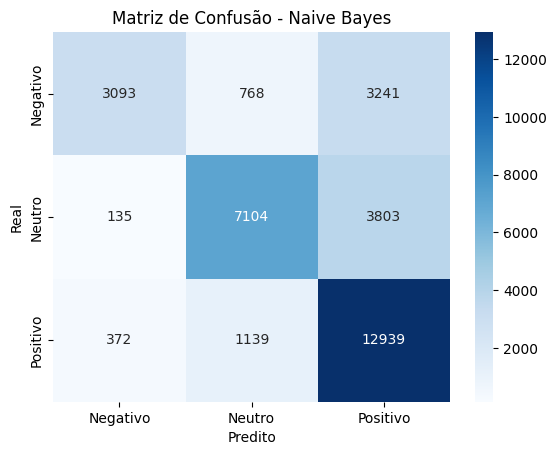

In [ ]:
# plotando a matriz de confusão do modelo de Naive Bayes
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Neutro", "Positivo"], yticklabels=["Negativo", "Neutro", "Positivo"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

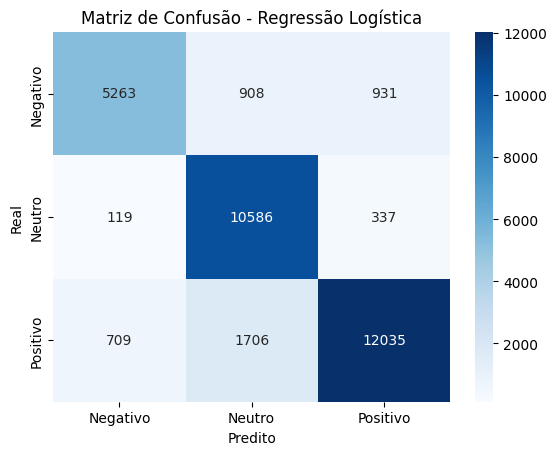

In [11]:
# Matriz de Confusão para o modelo de Regressão Logística
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Neutro", "Positivo"], yticklabels=["Negativo", "Neutro", "Positivo"]) 
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_16068\2226213942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette="viridis")


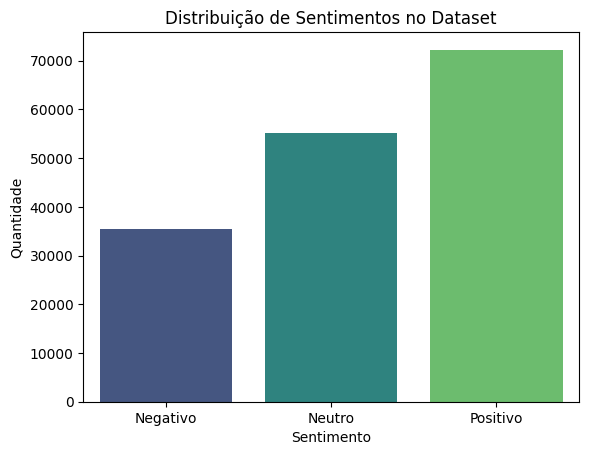

In [ ]:
# plotando a distribuição dos sentimentos no dataset
sns.countplot(x="category", data=df, palette="viridis")
plt.title("Distribuição de Sentimentos no Dataset")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.xticks(ticks=[0, 1, 2], labels=["Negativo", "Neutro", "Positivo"])
plt.show()

In [13]:
import plotly.express as px
import plotly.io as pio

# Gráfico de pizza para distribuição dos sentimentos
fig = px.pie(df, names='category', title='Distribuição de Sentimentos', 
             color_discrete_map={-1: 'red', 0: 'gray', 1: 'green'})

# Setando o renderer para o modo browser
pio.renderers.default = 'browser'

fig.show()

In [14]:
# Função para classificar um texto
def classificar_texto(texto):
    texto = vectorizer.transform([texto])
    return modelo_lr.predict(texto)[0]

# Testar a função
print(classificar_texto("I hate you"))  # Negativo
print(classificar_texto("I love you"))  # Positivo

-1.0
1.0


In [15]:
from sklearn.decomposition import LatentDirichletAllocation

# Treinar o modelo de LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

# Exibir os principais termos de cada tópico
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Tópico {i}: ", [feature_names[i] for i in topic.argsort()[-10:]])

Tópico 0:  ['pakistan', 'varanasi', 'elections', 'rally', 'strike', '2019', 'bjp', 'narendra', 'election', 'modi']
Tópico 1:  ['proud', 'vote', 'great', 'best', 'jai', 'narendra', 'india', 'sir', 'hai', 'modi']
Tópico 2:  ['nation', 'scientists', 'mission', 'narendra', 'satellite', 'drdo', 'credit', 'space', 'india', 'modi']
Tópico 3:  ['want', 'know', 'just', 'dont', 'india', 'people', 'like', 'vote', 'bjp', 'modi']
Tópico 4:  ['jobs', 'government', 'people', 'poor', 'years', 'congress', 'india', 'money', 'govt', 'modi']


In [16]:
# Otimizando o modelo de Regressão Logistica (melhor conforme os testes)
# importando o GridSearchCV para otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros a serem testados
param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 200, 300]}

# Criando o objeto GridSearch
grid = GridSearchCV(modelo_lr, param_grid, refit=True, verbose=2)

# Treinando o modelo
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros e o melhor score
print("Melhores parâmetros:", grid.best_params_)
print("Melhor score:", grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................C=0.1, max_iter=100; total time=   4.5s
[CV] END ................................C=0.1, max_iter=100; total time=   4.7s
[CV] END ................................C=0.1, max_iter=100; total time=   4.4s
[CV] END ................................C=0.1, max_iter=100; total time=   4.9s
[CV] END ................................C=0.1, max_iter=100; total time=   3.6s
[CV] END ................................C=0.1, max_iter=200; total time=   4.6s
[CV] END ................................C=0.1, max_iter=200; total time=   4.5s
[CV] END ................................C=0.1, max_iter=200; total time=   4.5s
[CV] END ................................C=0.1, max_iter=200; total time=   5.1s
[CV] END ................................C=0.1, max_iter=200; total time=   3.5s
[CV] END ................................C=0.1, max_iter=300; total time=   4.6s
[CV] END ................................C=0.1, m

d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..................................C=1, max_iter=100; total time=   6.3s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..................................C=1, max_iter=100; total time=   6.5s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..................................C=1, max_iter=100; total time=   6.2s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..................................C=1, max_iter=100; total time=   6.2s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END ..................................C=1, max_iter=100; total time=   6.7s
[CV] END ..................................C=1, max_iter=200; total time=   9.5s
[CV] END ..................................C=1, max_iter=200; total time=   6.8s
[CV] END ..................................C=1, max_iter=200; total time=   7.2s
[CV] END ..................................C=1, max_iter=200; total time=   8.0s
[CV] END ..................................C=1, max_iter=200; total time=   7.8s
[CV] END ..................................C=1, max_iter=300; total time=   9.3s
[CV] END ..................................C=1, max_iter=300; total time=   6.9s
[CV] END ..................................C=1, max_iter=300; total time=   7.3s
[CV] END ..................................C=1, max_iter=300; total time=   8.0s
[CV] END ..................................C=1, max_iter=300; total time=   7.8s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .................................C=10, max_iter=100; total time=   6.5s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .................................C=10, max_iter=100; total time=   6.5s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .................................C=10, max_iter=100; total time=   6.2s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .................................C=10, max_iter=100; total time=   6.2s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .................................C=10, max_iter=100; total time=   6.4s
[CV] END .................................C=10, max_iter=200; total time=  12.5s
[CV] END .................................C=10, max_iter=200; total time=  12.7s
[CV] END .................................C=10, max_iter=200; total time=  10.3s


d:\Fiap\Python projects\DataScience\AnaliseSentimental\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV] END .................................C=10, max_iter=200; total time=  12.8s
[CV] END .................................C=10, max_iter=200; total time=  10.1s
[CV] END .................................C=10, max_iter=300; total time=  12.6s
[CV] END .................................C=10, max_iter=300; total time=  12.6s
[CV] END .................................C=10, max_iter=300; total time=  10.2s
[CV] END .................................C=10, max_iter=300; total time=  13.8s
[CV] END .................................C=10, max_iter=300; total time=  10.2s
Melhores parâmetros: {'C': 10, 'max_iter': 200}
Melhor score: 0.8542895493767977


In [17]:
import joblib

# Salvar modelo treinado
joblib.dump(modelo_lr, "modelo.pkl")

# Salvar vetorizador
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']